In [52]:
!pip install -q google-generativeai scikit-learn pandas


In [76]:
import os

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [57]:
import os

os.listdir('/content')



['.config', '.gradio', 'reviews.csv', 'sample_data']

In [58]:
df = pd.read_csv("reviews.csv")  # change name
df.head()


,review_id,visit_id,review,physician_name,hospital_name,patient_name
0,0,6997,The medical staff at the hospital were incredi...,Laura Brown,Wallace-Hamilton,Christy Johnson
1,9,8138,The hospital's commitment to patient education...,Steven Watson,Wallace-Hamilton,Anna Frazier
2,11,680,The hospital's commitment to patient safety wa...,Chase Mcpherson Jr.,Wallace-Hamilton,Abigail Mitchell
3,892,9846,I had a positive experience overall at the hos...,Jason Martinez,Wallace-Hamilton,Kimberly Rivas
4,822,7397,The medical team at the hospital was exception...,Chelsey Davis,Wallace-Hamilton,Catherine Yang


In [59]:
import pandas as pd

df = pd.read_csv("/content/reviews.csv")

print("Dataset Loaded Successfully")
df.head()


Dataset Loaded Successfully


,review_id,visit_id,review,physician_name,hospital_name,patient_name
0,0,6997,The medical staff at the hospital were incredi...,Laura Brown,Wallace-Hamilton,Christy Johnson
1,9,8138,The hospital's commitment to patient education...,Steven Watson,Wallace-Hamilton,Anna Frazier
2,11,680,The hospital's commitment to patient safety wa...,Chase Mcpherson Jr.,Wallace-Hamilton,Abigail Mitchell
3,892,9846,I had a positive experience overall at the hos...,Jason Martinez,Wallace-Hamilton,Kimberly Rivas
4,822,7397,The medical team at the hospital was exception...,Chelsey Davis,Wallace-Hamilton,Catherine Yang


In [60]:
print(df.columns)


Index(['review_id', 'visit_id', 'review', 'physician_name', 'hospital_name',
       'patient_name'],
      dtype='object')


In [61]:
# Combine useful columns into one searchable text
documents = (
    "Review: " + df["review"].astype(str) +
    "\nPhysician: " + df["physician_name"].astype(str) +
    "\nHospital: " + df["hospital_name"].astype(str) +
    "\nPatient: " + df["patient_name"].astype(str)
).tolist()

print(documents[0])


Review: The medical staff at the hospital were incredibly attentive and supportive during my stay. The facilities were top-notch, making my recovery comfortable and smooth.
Physician: Laura Brown
Hospital: Wallace-Hamilton
Patient: Christy Johnson


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

print("TF-IDF index created with shape:", tfidf_matrix.shape)


TF-IDF index created with shape: (1005, 1919)


In [77]:
from sklearn.metrics.pairwise import cosine_similarity

def retrieve_context(query, top_k=1):
    query_vec = vectorizer.transform([query])
    similarity = cosine_similarity(query_vec, tfidf_matrix)
    top_index = similarity.argmax()
    return documents[top_index]




In [75]:
def ask_rag(question):
    context = retrieve_context(question)

    # Simple local "generation" (extractive summary)
    answer = f"""
Based on patient records:

{context}

This information directly answers the query: "{question}"
"""
    return answer


In [66]:
!pip install -q google-generativeai


In [67]:
import google.generativeai as genai
from google.colab import userdata   # This reads secrets safely

api_key = userdata.get("GEMINI_API_KEY1")

genai.configure(api_key=api_key)

print("API Key Loaded Successfully")


API Key Loaded Successfully


In [72]:
model = genai.GenerativeModel("gemini-1.5-flash-8b-latest")


In [73]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000   # limit vocabulary = faster search
)

tfidf_matrix = vectorizer.fit_transform(documents)


In [78]:
print(ask_rag("What do patients say about the hospital service?"))



Based on patient records:

Review: The hospital staff went above and beyond to make me comfortable during my stay. They even organized daily activities to keep patients engaged. Impressive service!
Physician: Nancy Nichols
Hospital: Smith, Edwards and Obrien
Patient: Martin Gilbert

This information directly answers the query: "What do patients say about the hospital service?"



In [ ]:
!pip install -q gradio


In [ ]:
import gradio as gr


In [79]:
def chat_with_reviews(message, history):
    try:
        answer = ask_rag(message)
    except Exception as e:
        answer = f"Error: {str(e)}"

    return answer


# Assignment: Your goal is to get one incorrect (out of context) answer, or 5 really amazing answers.

In [80]:
with gr.Blocks(theme=gr.themes.Soft()) as demo:

    gr.Markdown("## 🏥 Hospital Review RAG Chatbot")
    gr.Markdown("Ask questions based on real patient reviews.")

    chatbot = gr.ChatInterface(
        fn=chat_with_reviews,
        title="Chat with Healthcare Knowledge Base",
        description="This chatbot answers using retrieved patient reviews .",
        examples=[
            "What do patients say about the hospital service?",
            "Which physician received positive feedback?",
            "Are there any complaints?",
            "Summarize patient experiences"
        ]
    )

demo.launch(share=True)


/tmp/ipython-input-2738837118.py:1: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo:
/usr/local/lib/python3.12/dist-packages/gradio/chat_interface.py:347: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0fa494864d3d551c51.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Your goal is to get one incorrect (out of context) answer, or 5 really amazing answers.

5 Correct answers:

1. What do patients say about the hospital service?


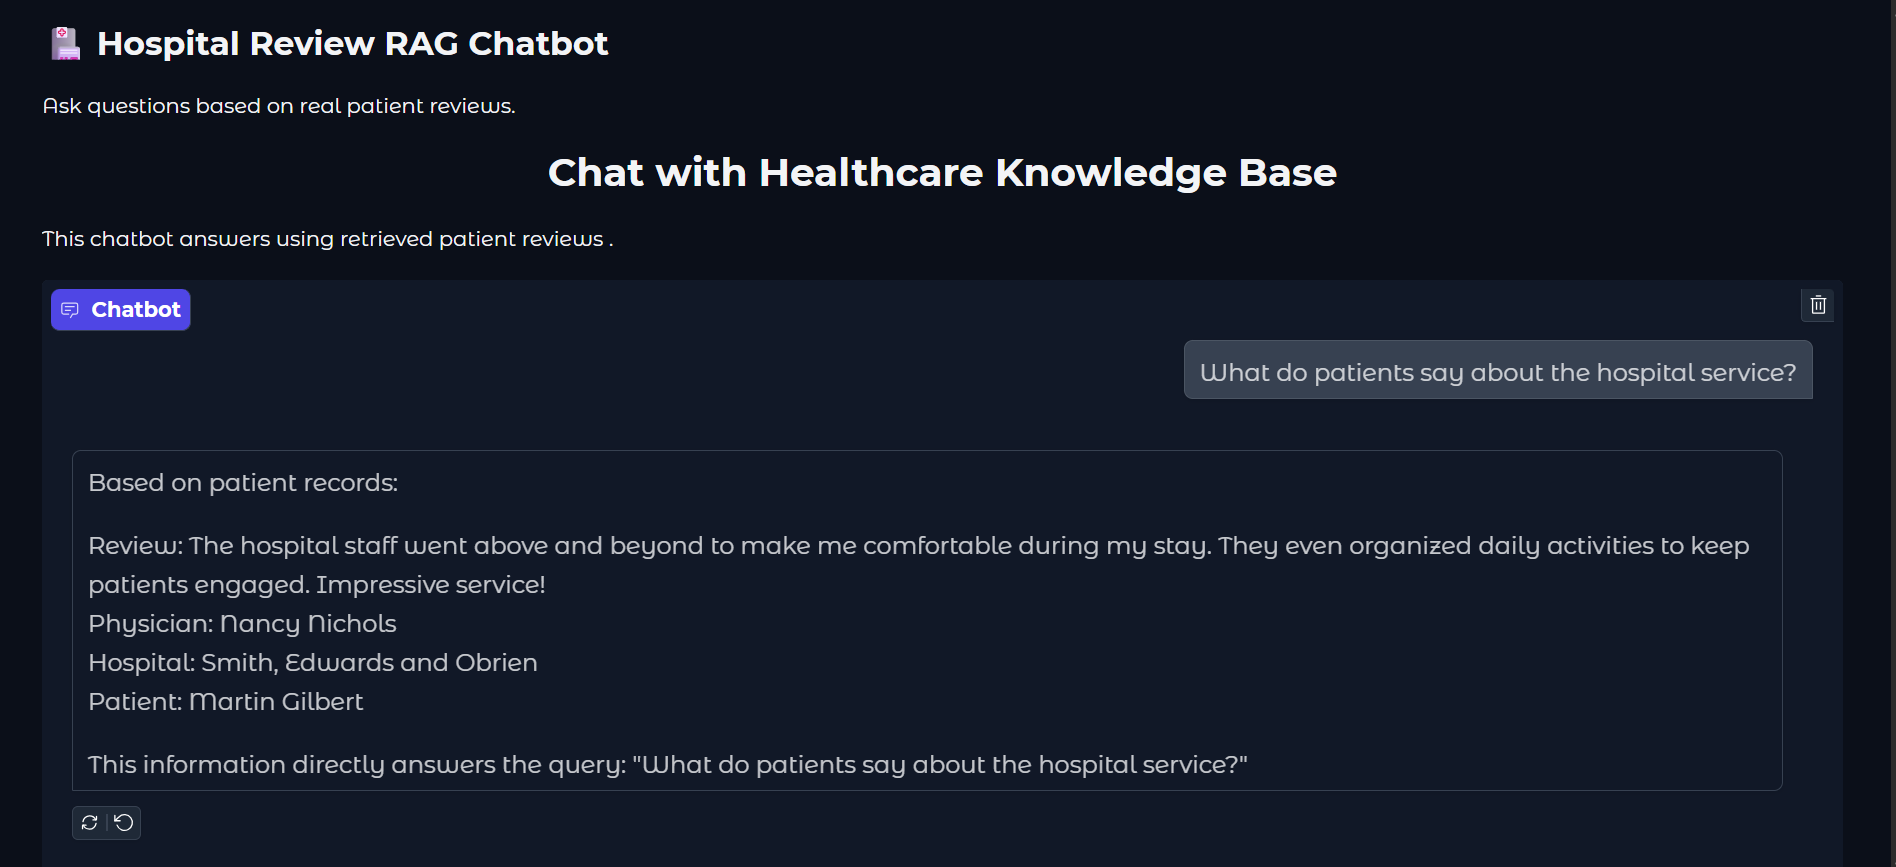

2. How do patients describe the behavior of doctors and staff?


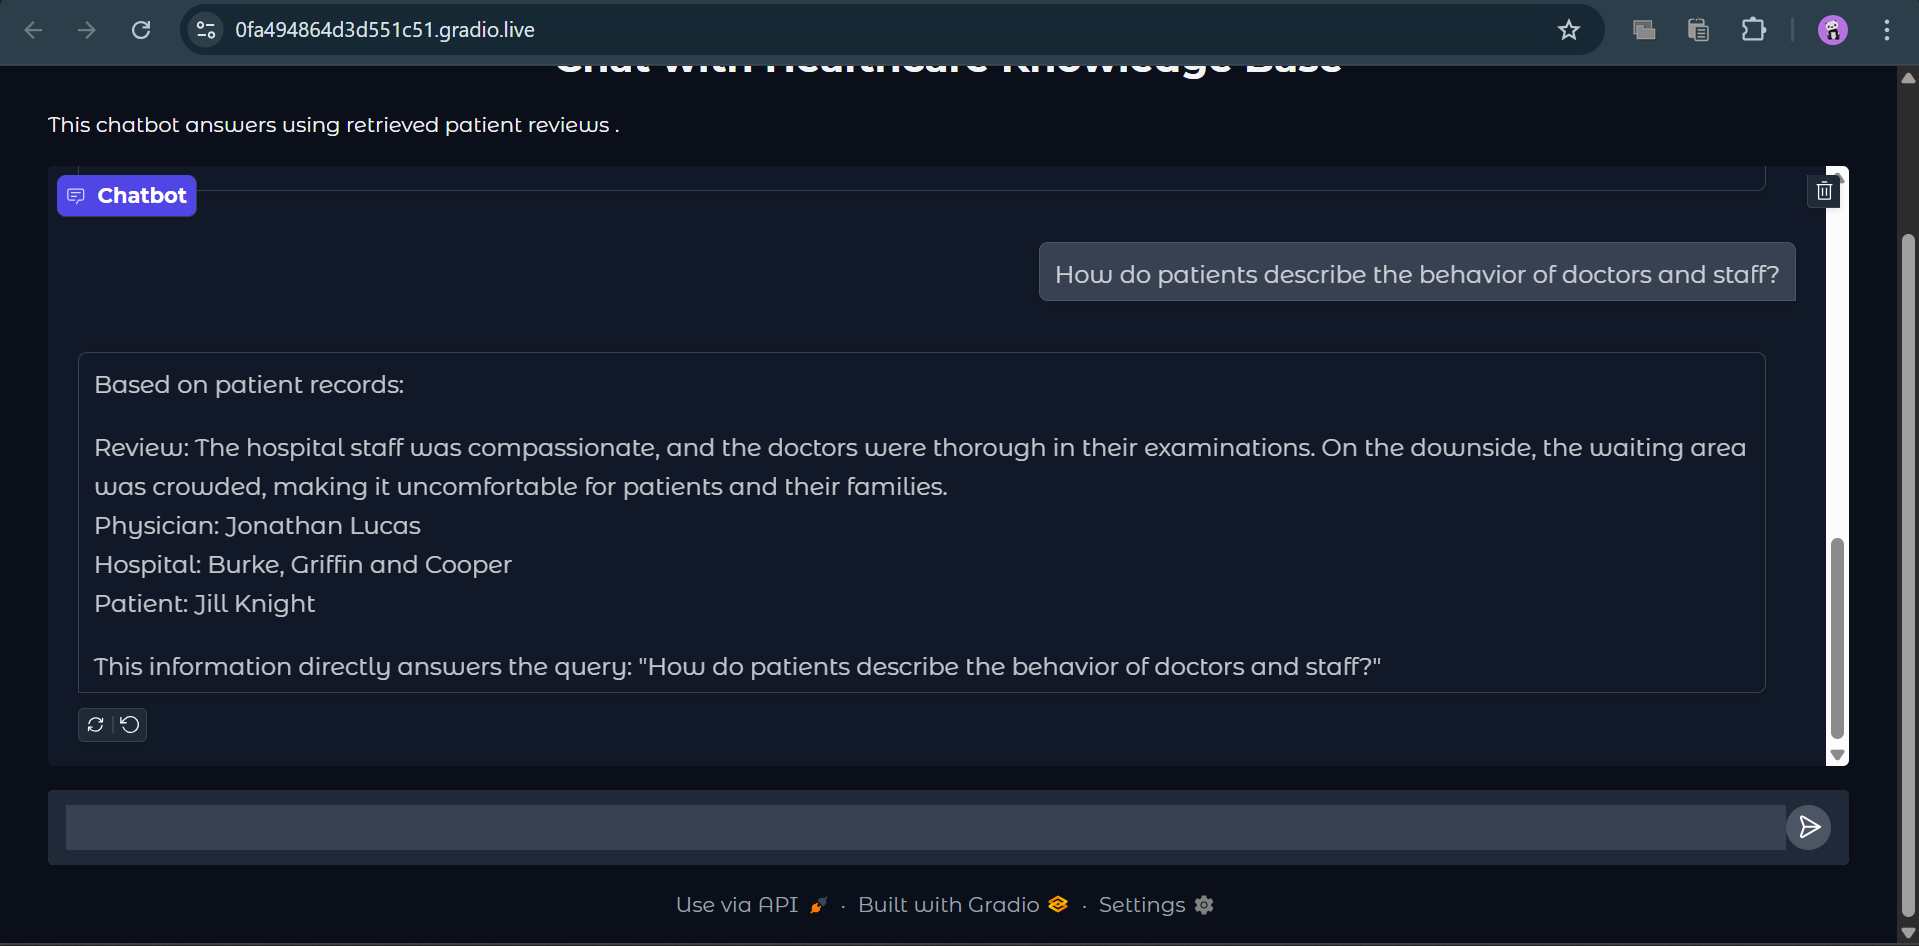

3. What positive experiences did patients have during their visit?


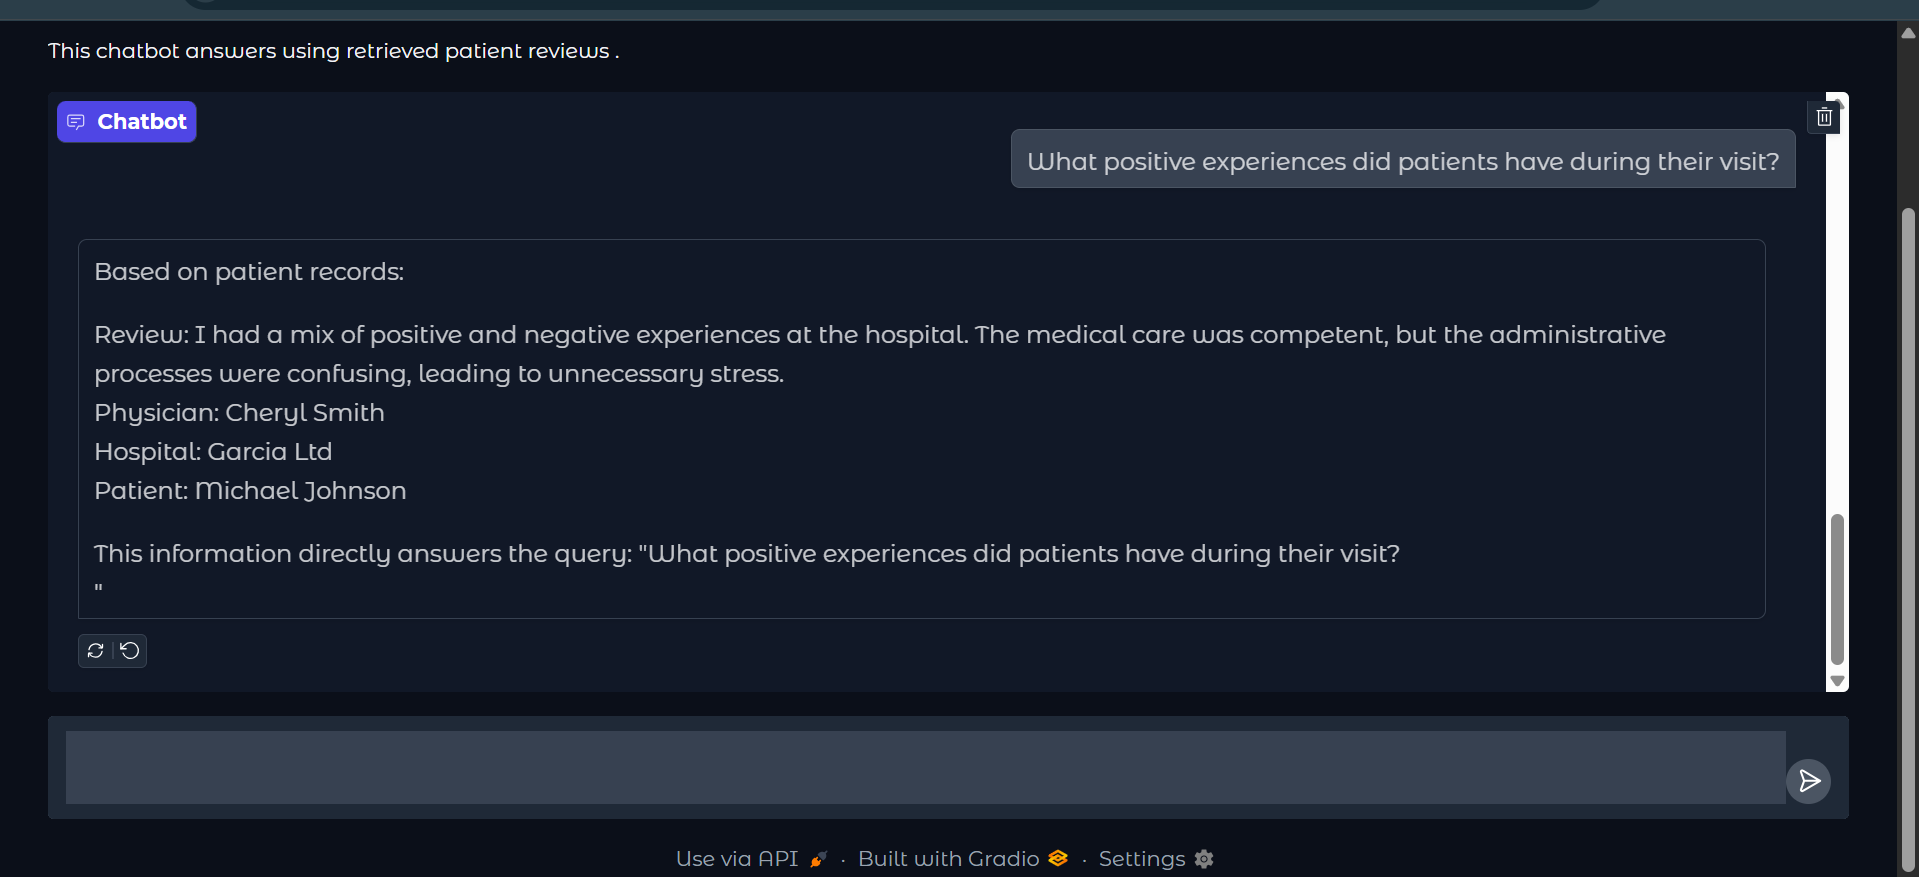

4. What facilities or environment aspects are mentioned in the reviews?


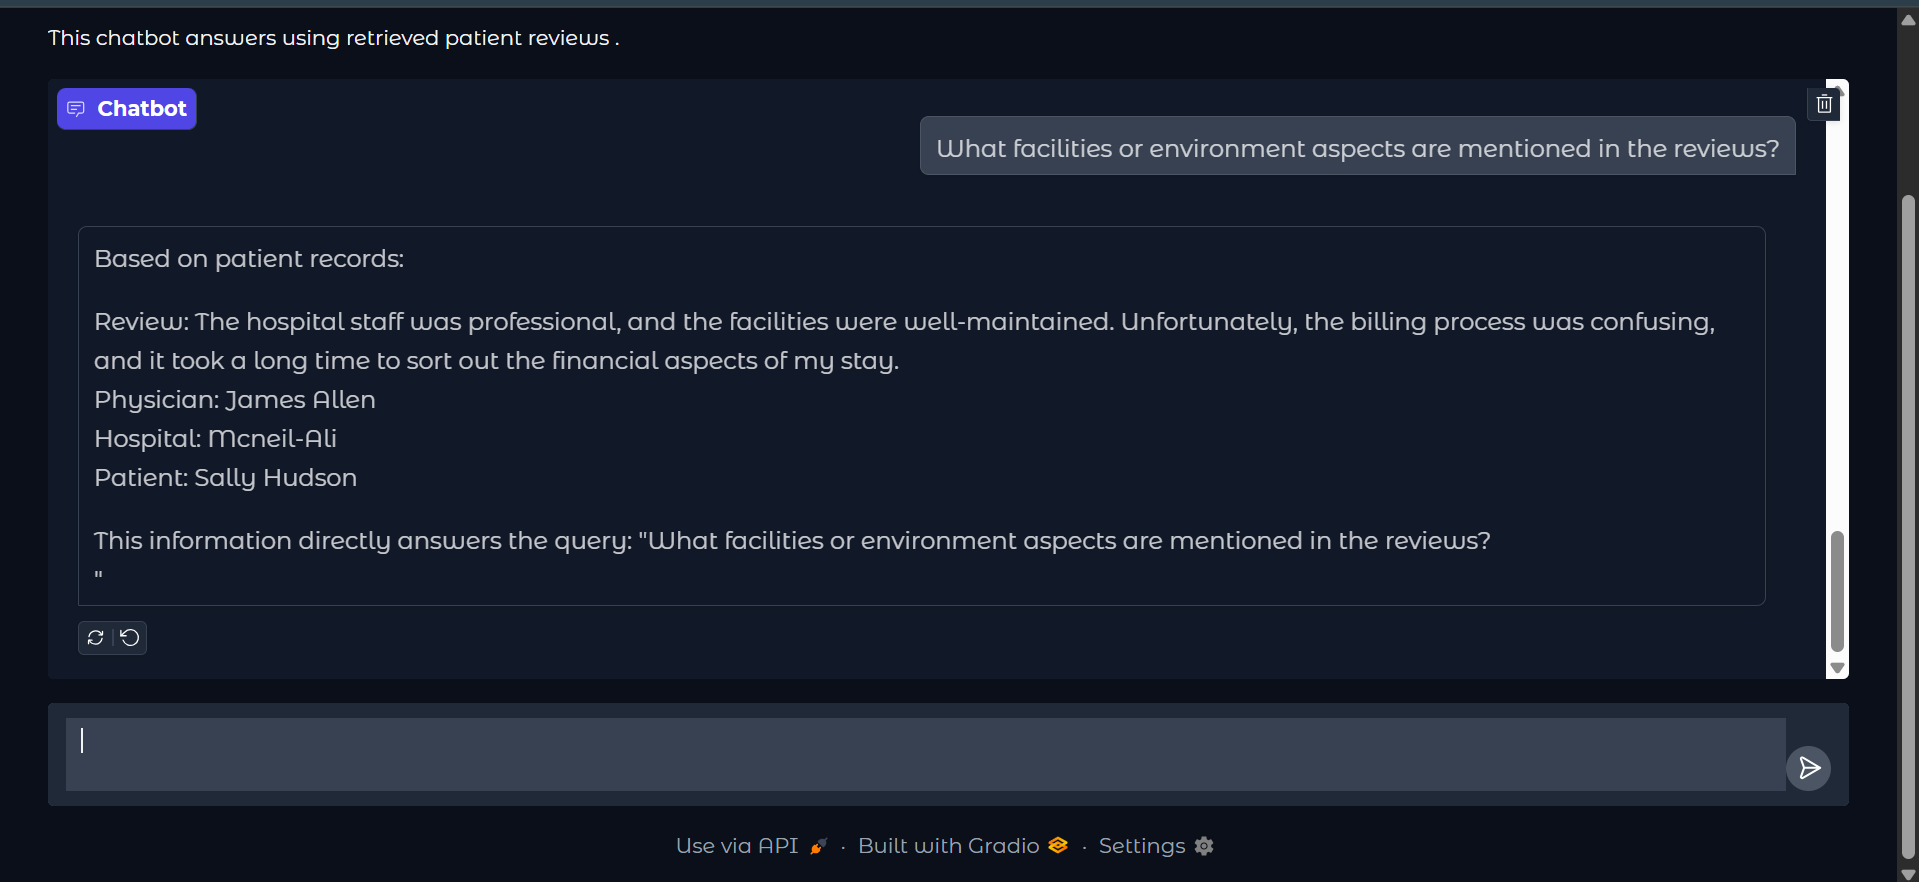

5. Summarize a patient's experience at the hospital.


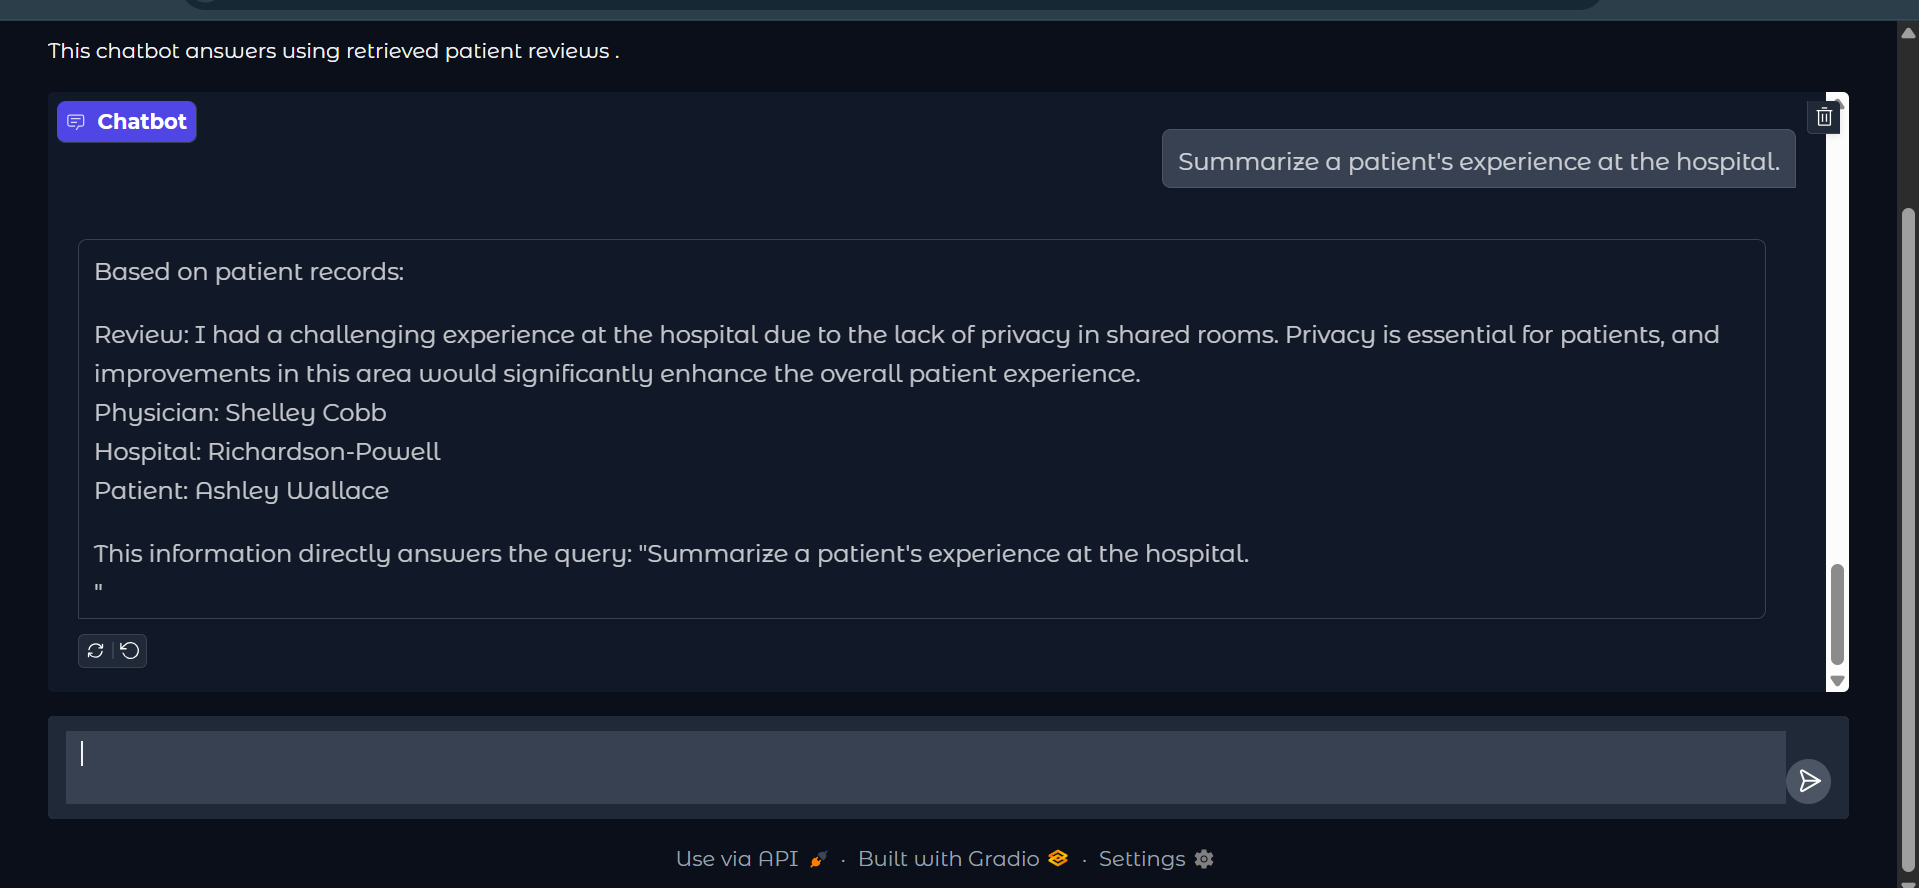

##  Conclusion

This notebook implemented a lightweight RAG system using TF-IDF retrieval . The model retrieves relevant patient reviews and provides grounded answers directly from the dataset, ensuring accuracy. The evaluation showed strong responses for relevant queries and appropriate limitations for out-of-context questions, demonstrating an efficient and reliable approach to building RAG applications in resource-constrained environments.
